In [1]:
import requests                      # used to send HTTP requests and interact with web pages.
from bs4 import BeautifulSoup        #used for web scraping. It helps parse and extract information from HTML and XML documents.
import numpy as np                   #for numerical computing in Python
import pandas as pd                  #data manipulation and analysis.
import matplotlib.pyplot as plt      #plotting library.
import seaborn as sns                #Seaborn is another data visualization library built on top of Matplotlib.


In [2]:
url = 'https://www.flipkart.com/search?q=laptop+under+20000&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&as-pos=2&as-type=RECENT&suggestionId=laptop+under+20000%7CLaptops&requestId=391506f8-dfb9-4bb7-8fea-8cdec70a9443&as-searchtext=laptop%20under%20'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
#print(soup)

#create new page change link
page_link = soup.find('a', class_='ge-49M _2Kfbh8').get('href')
chage_link = 'https://flipkart.com'+page_link
print(chage_link) 

https://flipkart.com/search?q=laptop+under+20000&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_13_na_na_na&as-pos=2&as-type=RECENT&suggestionId=laptop+under+20000%7CLaptops&requestId=391506f8-dfb9-4bb7-8fea-8cdec70a9443&as-searchtext=laptop+under+&page=1


In [3]:
#create empty list to store result of each section

product_name = []
prices = []
totals = []
offer = []
rating = []
processor = []
description = []


In [4]:
for i in range(1, 51):
    url = f"{chage_link[:-1]}{i}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    box = soup.find('div', class_='_1YokD2 _3Mn1Gg')
    product_details = box.find_all('div', class_='_3pLy-c row')
    
    for detail in product_details:
        
        #get product name from page
        name = detail.find('div', class_='_4rR01T')
        if name is not None:
            product_name.append(name.text)
        else:
            product_name.append('N/A')
        
        #get product price from page
        price = detail.find('div', class_='_30jeq3 _1_WHN1')
        if price is not None:
            prices.append(price.text)
        else:
            prices.append('N/A')
        
        #get product total price from page
        total = detail.find('div', class_='_3I9_wc _27UcVY')
        if total is not None:
            totals.append(total.text)
        else:
            totals.append('N/A')
        
        ##get product offer from page
        off = detail.find('div', class_='_3Ay6Sb')
        if off is not None:
            off_span = off.find('span')
            if off_span is not None:
                offer.append(off_span.text)
            else:
                offer.append('N/A')
        else:
            offer.append('N/A')
        
        
        ##get product rating from page
        rate = detail.find('div', class_='_3LWZlK')
        if rate is not None:
            rating.append(rate.text)
        else:
            rating.append('N/A')
        
        
        #get product processor from page
        pro = detail.find('li', class_='rgWa7D')
        if pro is not None:
            processor.append(pro.text)
        else:
            processor.append('N/A')
            
            
        ##get product description from page    
        desc = detail.find('ul', class_='_1xgFaf')
        if desc is not None:
            description.append(desc.text)
        else:
            description.append('N/A')
    

In [5]:
#Change to dataframe information
df = pd.DataFrame({"Product_Name":product_name,"Total":totals,"Selling_Price":prices,"Offer":offer,"Ratings":rating,"Processor":processor,"Description":description})


In [6]:
# convert to csv file 
df.to_csv('laptop_details.csv', index=False)

In [7]:
df.head(10)


,Product_Name,Total,Selling_Price,Offer,Ratings,Processor,Description
0,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,"₹29,990","₹20,990",30% off,N/A,Intel Celeron Quad Core Processor (11th Gen),Intel Celeron Quad Core Processor (11th Gen)4 ...
1,Infinix ZERO BOOK ULTRA Series Laptop Intel Co...,"₹1,49,990","₹94,990",36% off,4.3,Intel Core i9 Processor (12th Gen),Intel Core i9 Processor (12th Gen)32 GB LPDDR5...
2,Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...,"₹35,000","₹18,999",45% off,3.8,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMWin...
3,ASUS Chromebook Touch Intel Celeron Dual Core ...,"₹30,990","₹18,990",38% off,3.8,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB LPDDR4 R...
4,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,"₹38,000","₹18,490",51% off,3.8,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMDOS...
5,Avita SATUS S111 Celeron Dual Core - (4 GB/128...,"₹29,990","₹16,490",45% off,3.7,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB DDR4 RAM...
6,ASUS Chromebook Touch Intel Celeron Dual Core ...,"₹29,990","₹17,990",40% off,3.9,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB LPDDR4 R...
7,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,"₹44,990","₹27,990",37% off,4.2,Intel Core i3 Processor (10th Gen),Intel Core i3 Processor (10th Gen)8 GB LPDDR4X...
8,Avita SATUS S111 Celeron Dual Core - (4 GB/128...,"₹29,990","₹16,490",45% off,3.7,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB DDR4 RAM...
9,ASUS EeeBook 12 Celeron Dual Core 4th Gen - (4...,"₹25,990","₹17,990",30% off,3.9,Intel Celeron Dual Core Processor (4th Gen),Intel Celeron Dual Core Processor (4th Gen)4 G...


In [8]:
#dimensions of the DataFrame in the format (rows, columns).
df.shape

(984, 7)

In [9]:
#information about the DataFrame, including the number of non-null values, data types of columns, memory usage, and more.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_Name   984 non-null    object
 1   Total          984 non-null    object
 2   Selling_Price  984 non-null    object
 3   Offer          984 non-null    object
 4   Ratings        984 non-null    object
 5   Processor      984 non-null    object
 6   Description    984 non-null    object
dtypes: object(7)
memory usage: 53.9+ KB


In [10]:
#create a way to represent missing or unknown data.
df.replace('N/A', np.nan, inplace=True)

In [11]:
#It returns a Series object that shows the count of null values for each column.
df.isnull().sum()

Product_Name       0
Total              7
Selling_Price      1
Offer             10
Ratings          204
Processor          0
Description        0
dtype: int64

In [12]:
# Create method to drop rows containing missing values (NaN). So for this dropna is used to remove rows with NaN values.
df.dropna(subset=['Total','Selling_Price','Offer'], inplace=True, axis=0)


In [13]:
df['Total'] = df['Total'].str.replace('₹', '').str.replace(',', '').astype('int')
df['Selling_Price'] = df['Selling_Price'].str.replace('₹', '').str.replace(',', '').astype('int')
df['Offer'] = df['Offer'].str.replace('off', '')

In [14]:
df.head(10)

,Product_Name,Total,Selling_Price,Offer,Ratings,Processor,Description
0,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,29990,20990,30%,NaN,Intel Celeron Quad Core Processor (11th Gen),Intel Celeron Quad Core Processor (11th Gen)4 ...
1,Infinix ZERO BOOK ULTRA Series Laptop Intel Co...,149990,94990,36%,4.3,Intel Core i9 Processor (12th Gen),Intel Core i9 Processor (12th Gen)32 GB LPDDR5...
2,Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...,35000,18999,45%,3.8,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMWin...
3,ASUS Chromebook Touch Intel Celeron Dual Core ...,30990,18990,38%,3.8,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB LPDDR4 R...
4,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,38000,18490,51%,3.8,AMD Athlon Dual Core Processor,AMD Athlon Dual Core Processor4 GB DDR4 RAMDOS...
5,Avita SATUS S111 Celeron Dual Core - (4 GB/128...,29990,16490,45%,3.7,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB DDR4 RAM...
6,ASUS Chromebook Touch Intel Celeron Dual Core ...,29990,17990,40%,3.9,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB LPDDR4 R...
7,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,44990,27990,37%,4.2,Intel Core i3 Processor (10th Gen),Intel Core i3 Processor (10th Gen)8 GB LPDDR4X...
8,Avita SATUS S111 Celeron Dual Core - (4 GB/128...,29990,16490,45%,3.7,Intel Celeron Dual Core Processor,Intel Celeron Dual Core Processor4 GB DDR4 RAM...
9,ASUS EeeBook 12 Celeron Dual Core 4th Gen - (4...,25990,17990,30%,3.9,Intel Celeron Dual Core Processor (4th Gen),Intel Celeron Dual Core Processor (4th Gen)4 G...


In [15]:
#regular expression (regex) pattern to identify the RAM capacity in GB.
df['RAM'] = df['Description'].str.extract(r'(\d+\s*GB)')
print(df['RAM'].head(10))

0     4 GB
1    32 GB
2     4 GB
3     4 GB
4     4 GB
5     4 GB
6     4 GB
7     8 GB
8     4 GB
9     4 GB
Name: RAM, dtype: object


In [16]:
print(df['Product_Name'].head(10))

0    Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...
1    Infinix ZERO BOOK ULTRA Series Laptop Intel Co...
2    Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...
3    ASUS Chromebook Touch Intel Celeron Dual Core ...
4    Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...
5    Avita SATUS S111 Celeron Dual Core - (4 GB/128...
6    ASUS Chromebook Touch Intel Celeron Dual Core ...
7    Infinix INBook Y1 Plus Intel Core i3 10th Gen ...
8    Avita SATUS S111 Celeron Dual Core - (4 GB/128...
9    ASUS EeeBook 12 Celeron Dual Core 4th Gen - (4...
Name: Product_Name, dtype: object


In [17]:
#splits each element in the 'Product_Name' column into a list of substrings using the '-' character as a delimiter
df['Product_Name'] = df['Product_Name'].str.split('-')
df['Product_Name'] = df['Product_Name'].str.get(0)
print(df['Product_Name'].head(10))

0    Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...
1    Infinix ZERO BOOK ULTRA Series Laptop Intel Co...
2                       Lenovo Athlon Dual Core 3050U 
3       ASUS Chromebook Touch Intel Celeron Dual Core 
4                             Lenovo Athlon Dual Core 
5                  Avita SATUS S111 Celeron Dual Core 
6       ASUS Chromebook Touch Intel Celeron Dual Core 
7       Infinix INBook Y1 Plus Intel Core i3 10th Gen 
8                  Avita SATUS S111 Celeron Dual Core 
9           ASUS EeeBook 12 Celeron Dual Core 4th Gen 
Name: Product_Name, dtype: object


In [18]:
#get brand name from product name column
df['Brand'] = df['Product_Name'].str.split()
df['Brand'] = df['Brand'].str.get(0)
print(df['Brand'].head(10))

0    Infinix
1    Infinix
2     Lenovo
3       ASUS
4     Lenovo
5      Avita
6       ASUS
7    Infinix
8      Avita
9       ASUS
Name: Brand, dtype: object


In [19]:
#get processor brand from processor column
df['Processor_Brand'] = df['Processor'].str.split()
df['Processor_Brand'] = df['Processor_Brand'].str.get(0)
print(df['Processor_Brand'].head(10))

0    Intel
1    Intel
2      AMD
3    Intel
4      AMD
5    Intel
6    Intel
7    Intel
8    Intel
9    Intel
Name: Processor_Brand, dtype: object


In [20]:
#creates a new DataFrame
df = df[['Product_Name','Brand','RAM','Offer','Ratings','Selling_Price','Total','Processor_Brand','Processor']]

In [21]:
df.isnull().sum()

Product_Name         0
Brand                0
RAM                  0
Offer                0
Ratings            201
Selling_Price        0
Total                0
Processor_Brand      0
Processor            0
dtype: int64

In [22]:
#calculates the average rating from the 'Ratings' column in the DataFrame.
avg_rating = round(df['Ratings'].astype('float').mean(),1)

#replaces any missing values in the 'Ratings' column of the DataFrame.
df['Ratings'].fillna(avg_rating, inplace=True)
df['Ratings'] = df['Ratings'].astype('float')

In [23]:
#creates a new DataFrame
df = df[['Product_Name','Brand','RAM','Offer','Ratings','Selling_Price','Total','Processor_Brand','Processor']]

In [24]:
df.isnull().sum()

Product_Name       0
Brand              0
RAM                0
Offer              0
Ratings            0
Selling_Price      0
Total              0
Processor_Brand    0
Processor          0
dtype: int64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 983
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Name     974 non-null    object 
 1   Brand            974 non-null    object 
 2   RAM              974 non-null    object 
 3   Offer            974 non-null    object 
 4   Ratings          974 non-null    float64
 5   Selling_Price    974 non-null    int32  
 6   Total            974 non-null    int32  
 7   Processor_Brand  974 non-null    object 
 8   Processor        974 non-null    object 
dtypes: float64(1), int32(2), object(6)
memory usage: 68.5+ KB


In [26]:
#clean dataset into csv
df.to_csv('Clean dataset laptop.csv', index=False)

In [27]:
df.head(10)

,Product_Name,Brand,RAM,Offer,Ratings,Selling_Price,Total,Processor_Brand,Processor
0,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,Infinix,4 GB,30%,4.2,20990,29990,Intel,Intel Celeron Quad Core Processor (11th Gen)
1,Infinix ZERO BOOK ULTRA Series Laptop Intel Co...,Infinix,32 GB,36%,4.3,94990,149990,Intel,Intel Core i9 Processor (12th Gen)
2,Lenovo Athlon Dual Core 3050U,Lenovo,4 GB,45%,3.8,18999,35000,AMD,AMD Athlon Dual Core Processor
3,ASUS Chromebook Touch Intel Celeron Dual Core,ASUS,4 GB,38%,3.8,18990,30990,Intel,Intel Celeron Dual Core Processor
4,Lenovo Athlon Dual Core,Lenovo,4 GB,51%,3.8,18490,38000,AMD,AMD Athlon Dual Core Processor
5,Avita SATUS S111 Celeron Dual Core,Avita,4 GB,45%,3.7,16490,29990,Intel,Intel Celeron Dual Core Processor
6,ASUS Chromebook Touch Intel Celeron Dual Core,ASUS,4 GB,40%,3.9,17990,29990,Intel,Intel Celeron Dual Core Processor
7,Infinix INBook Y1 Plus Intel Core i3 10th Gen,Infinix,8 GB,37%,4.2,27990,44990,Intel,Intel Core i3 Processor (10th Gen)
8,Avita SATUS S111 Celeron Dual Core,Avita,4 GB,45%,3.7,16490,29990,Intel,Intel Celeron Dual Core Processor
9,ASUS EeeBook 12 Celeron Dual Core 4th Gen,ASUS,4 GB,30%,3.9,17990,25990,Intel,Intel Celeron Dual Core Processor (4th Gen)


In [28]:
#Now we start Data Analysis and Visulizations


print((f"Total laptops are: {len(df['Product_Name'].unique())}pcs."))

Total laptops are: 399pcs.


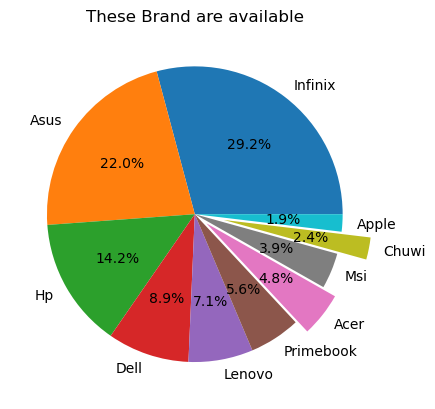

In [29]:
#finds the top 10 brands with the highest number of products, 
#creates a pie chart representing the distribution of products across these brands, 
#and displays the chart with brand names, count percentages, and an explode effect for a couple of slices to enhance visibility.

laptop_brand = df.groupby('Brand', as_index=False)['Product_Name'].count().sort_values(by='Product_Name', ascending=False).head(10)
brand_name = [i.capitalize() for i in laptop_brand['Brand']] #This way we can capitalized the brand name.
myexplode = [0,0,0,0,0,0,0.1,0,0.2,0]
plt.pie(laptop_brand['Product_Name'], labels=brand_name, explode=myexplode, autopct='%1.1f%%') 

plt.title('These Brand are available')
plt.show()

In [30]:
#Top 10 rating Brands

top10_rating_brand = df.groupby(['Brand'], as_index=False)['Ratings'].mean().round(1).sort_values(by='Ratings', ascending=False).head(10)
print(f"top10_rating_brand \n\n{top10_rating_brand}")
 

top10_rating_brand 

        Brand  Ratings
1       APPLE      4.6
15       acer      4.4
5       CHUWI      4.4
7    GIGABYTE      4.4
11        MSI      4.3
8          HP      4.2
9     Infinix      4.2
14    SAMSUNG      4.2
13  RedmiBook      4.2
16     realme      4.2


In [31]:
#Top processor rating
top_rating_processor = df.groupby('Processor_Brand',as_index=False)['Ratings'].mean().round(1).sort_values(by='Ratings',ascending=False)
processor_brands = ['AMD', 'Intel', 'MediaTek', 'Qualcomm']
x = top_rating_processor[top_rating_processor['Processor_Brand'].isin(processor_brands)]

print(f"top_rating_processor \n\n{x}")


top_rating_processor 

   Processor_Brand  Ratings
0              AMD      4.2
5            Intel      4.2
6         MediaTek      4.1
11        Qualcomm      4.0


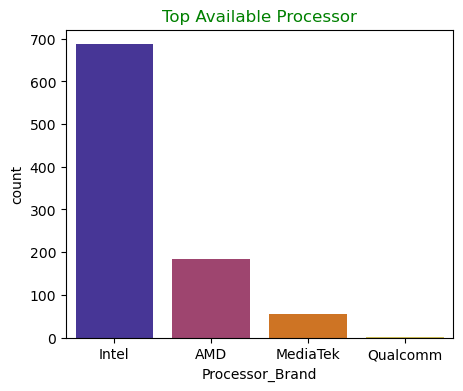

In [32]:
#Chart for Top available processor
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Processor_Brand', data=df[df['Processor_Brand'].isin(processor_brands)], palette='CMRmap')
plt.title('Top Available Processor',color='g')
plt.show()

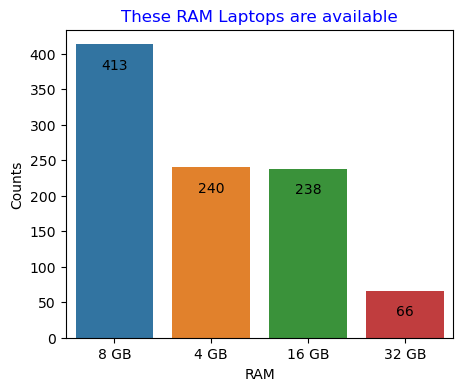

In [33]:
#chart analysis for availablity of laptop using RAM
ram_type = df.groupby('RAM', as_index=False)['Brand'].count().sort_values(by='Brand', ascending=False).head(4)
plt.figure(figsize=(5,4)) #Chart size
ax = sns.barplot(x='RAM', y='Brand', data=ram_type) 
plt.title('These RAM Laptops are available',color='b')
plt.ylabel('Counts')
for bars in ax.containers:
    ax.bar_label(bars, padding=-20)

In [34]:
#Minimun price of Laptops 

min_price_laptop = df.groupby('Product_Name', as_index=False)['Selling_Price'].min().sort_values(by='Selling_Price', ascending=True).head(10)
print(f"Minimun price of Laptops \n\n{min_price_laptop}")


Minimun price of Laptops 

                                          Product_Name  Selling_Price
389        Primebook 4G Android Based MediaTek MT8788           13990
322  Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...          13990
167                Avita SATUS S111 Celeron Dual Core           16490
166         Avita PURA E 14 Ryzen 5 Quad Core 3rd Gen           16990
9       ASUS Chromebook Touch Intel Celeron Dual Core           17990
16          ASUS EeeBook 12 Celeron Dual Core 4th Gen           17990
165                       Avita PURA APU Dual Core A6           18390
313                           Lenovo Athlon Dual Core           18490
314                     Lenovo Athlon Dual Core 3050U           18999
168                  CHUWI Celeron Dual Core 10th Gen           19990


In [35]:
#Maximum price of Laptops

max_price_laptop = df.groupby('Product_Name', as_index=False)['Selling_Price'].max().sort_values(by='Selling_Price', ascending=False).head(10)
print(f"Maximum price of Laptops \n\n{max_price_laptop}")


Maximum price of Laptops 

                                          Product_Name  Selling_Price
378                              MSI Core i9 13th Gen          599990
51   ASUS ROG Zephyrus M16 (2023) with 90WHr Batter...         364990
38   ASUS ROG Strix SCAR 18 (2023) with 90WHr Batte...         362327
40   ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...         361990
171                   DELL Alienware Core i9 11th Gen          323990
170                   DELL Alienware Core i7 12th Gen          300490
27   ASUS ROG Flow Z13 (2022) with RTX 3080 eGPU Co...         296990
256                    HP Omen Intel Core i9 12th Gen          296000
386                 MSI Stealth GS66 Core i7 12th Gen          275990
37   ASUS ROG Strix SCAR 17 (2023) with 90WHr Batte...         269990


In [36]:
df.head(10)

,Product_Name,Brand,RAM,Offer,Ratings,Selling_Price,Total,Processor_Brand,Processor
0,Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...,Infinix,4 GB,30%,4.2,20990,29990,Intel,Intel Celeron Quad Core Processor (11th Gen)
1,Infinix ZERO BOOK ULTRA Series Laptop Intel Co...,Infinix,32 GB,36%,4.3,94990,149990,Intel,Intel Core i9 Processor (12th Gen)
2,Lenovo Athlon Dual Core 3050U,Lenovo,4 GB,45%,3.8,18999,35000,AMD,AMD Athlon Dual Core Processor
3,ASUS Chromebook Touch Intel Celeron Dual Core,ASUS,4 GB,38%,3.8,18990,30990,Intel,Intel Celeron Dual Core Processor
4,Lenovo Athlon Dual Core,Lenovo,4 GB,51%,3.8,18490,38000,AMD,AMD Athlon Dual Core Processor
5,Avita SATUS S111 Celeron Dual Core,Avita,4 GB,45%,3.7,16490,29990,Intel,Intel Celeron Dual Core Processor
6,ASUS Chromebook Touch Intel Celeron Dual Core,ASUS,4 GB,40%,3.9,17990,29990,Intel,Intel Celeron Dual Core Processor
7,Infinix INBook Y1 Plus Intel Core i3 10th Gen,Infinix,8 GB,37%,4.2,27990,44990,Intel,Intel Core i3 Processor (10th Gen)
8,Avita SATUS S111 Celeron Dual Core,Avita,4 GB,45%,3.7,16490,29990,Intel,Intel Celeron Dual Core Processor
9,ASUS EeeBook 12 Celeron Dual Core 4th Gen,ASUS,4 GB,30%,3.9,17990,25990,Intel,Intel Celeron Dual Core Processor (4th Gen)


In [37]:
#Product under 20000
Product_under_20000 = df[df['Selling_Price']<=20000]
Product_under_20000 = Product_under_20000[['Product_Name','Selling_Price','Ratings','Processor_Brand','RAM','Offer']].head(10)
print(Product_under_20000)

                                      Product_Name  Selling_Price  Ratings  \
2                   Lenovo Athlon Dual Core 3050U           18999      3.8   
3   ASUS Chromebook Touch Intel Celeron Dual Core           18990      3.8   
4                         Lenovo Athlon Dual Core           18490      3.8   
5              Avita SATUS S111 Celeron Dual Core           16490      3.7   
6   ASUS Chromebook Touch Intel Celeron Dual Core           17990      3.9   
8              Avita SATUS S111 Celeron Dual Core           16490      3.7   
9       ASUS EeeBook 12 Celeron Dual Core 4th Gen           17990      3.9   
13                        Lenovo Athlon Dual Core           18990      4.7   
14             Avita SATUS S111 Celeron Dual Core           16490      3.7   
15            HP Chromebook MediaTek Kompanio 500           19999      3.7   

   Processor_Brand   RAM Offer  
2              AMD  4 GB  45%   
3            Intel  4 GB  38%   
4              AMD  4 GB  51%   
5        